## Combining Features for Regression and Classification Models

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_excel("/content/drive/MyDrive/Spechio_Project/SCUT-FBP5500_v2/All_Ratings.xlsx")

In [4]:
ratings.head(5)

,Rater,Filename,Rating,original Rating
0,1,CF1.jpg,3,NaN
1,1,CF10.jpg,3,NaN
2,1,CF100.jpg,1,NaN
3,1,CF101.jpg,2,NaN
4,1,CF102.jpg,3,NaN


In [5]:
ratings_avg = ratings.groupby('Filename')['Rating'].mean().reset_index()
ratings_avg.shape

(5500, 2)

In [6]:
ratings_avg.head(5)

,Filename,Rating
0,AF1.jpg,2.333333
1,AF10.jpg,3.433333
2,AF100.jpg,2.900000
3,AF1000.jpg,3.966667
4,AF1001.jpg,3.733333


<Axes: xlabel='Rating', ylabel='Density'>

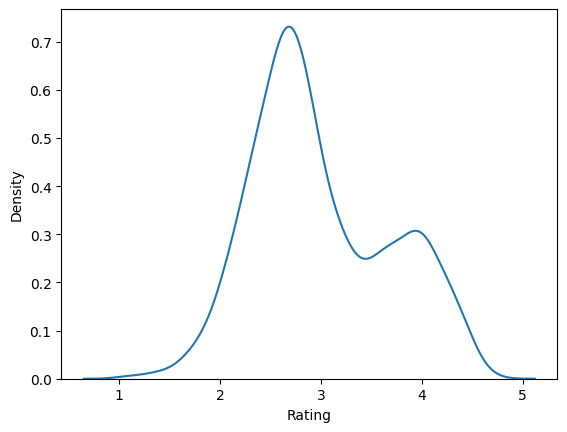

In [7]:
sns.kdeplot(ratings_avg['Rating'])

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

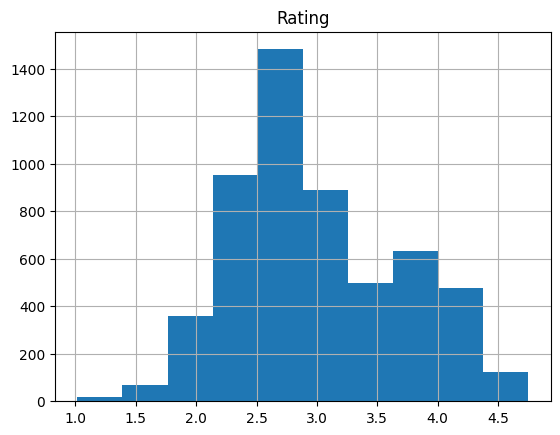

In [8]:
ratings_avg.hist(column='Rating')

In [9]:
gr = pd.read_csv("/content/drive/MyDrive/Spechio_Project/golden_ratios.csv")

In [10]:
sr = pd.read_csv("/content/drive/MyDrive/Spechio_Project/symmetric_ratios.csv")

In [11]:
glcm = pd.read_csv("/content/drive/MyDrive/Spechio_Project/glcm_features.csv")

In [12]:
hu = pd.read_csv("/content/drive/MyDrive/Spechio_Project/hu_moments.csv")

Features for regression

In [13]:
features_regression = pd.merge(gr,sr,on='Image Name',how='left')
features_regression = pd.merge(features_regression,glcm,on='Image Name',how='left')
features_regression = pd.merge(features_regression,hu,on='Image Name',how='left')
features_regression

,Image Name,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,...,Contrast,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7
0,AM218.jpg,1.981239,2.836753,1.339132,1.344277,1.924745,2.119258,0.698418,2.810133,3.296268,...,64.115677,0.267573,0.994363,3.008452,7.453705,11.847560,11.061994,-22.518465,-14.789184,-23.571473
1,AM1948.jpg,1.833635,2.929858,1.270414,1.030303,1.646262,3.002603,0.625844,3.437585,1.994821,...,227.285927,0.356354,0.987348,2.939510,7.042255,12.052818,12.672708,-25.051330,-16.236641,-25.611590
2,AM1946.jpg,1.933288,2.395209,1.465257,1.564513,1.938322,1.566378,0.807148,2.495686,2.343096,...,129.332771,0.294714,0.991391,2.981613,7.460082,10.863173,10.597546,-21.330205,-14.364314,-22.316672
3,AM214.jpg,1.882761,2.341275,1.431507,1.531422,1.904373,2.315791,0.804161,3.459990,2.684211,...,312.500025,0.149893,0.976310,2.748384,6.986360,9.662708,9.387926,18.942285,12.945501,19.364469
4,AM1939.jpg,1.937528,2.324811,1.584223,1.333695,1.600281,3.693109,0.833413,4.915896,3.172618,...,105.220221,0.360506,0.990929,3.042141,8.100464,11.354806,10.838226,-22.403855,-15.233655,21.961341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,CF710.jpg,1.924013,2.483051,1.735093,1.370213,1.768340,1.550767,0.774858,2.191186,6.519202,...,225.159902,0.192622,0.986148,2.818653,6.729160,10.130414,10.211114,-20.431246,-13.592385,-20.727749
5481,CF438.jpg,1.888889,2.644444,1.650870,1.587381,2.222333,1.399654,0.714286,1.922305,3.607370,...,127.063872,0.335066,0.989988,2.921040,8.002540,11.058992,10.553896,21.362571,14.577149,-22.355600
5482,CF711.jpg,2.203964,3.361684,1.646898,1.818176,2.773245,1.685601,0.655613,2.082643,2.113201,...,197.747753,0.036160,0.983474,2.993462,7.884668,9.813330,10.603605,-22.012686,-15.676459,20.812936
5483,CF444.jpg,2.017300,2.705405,1.796432,1.680804,2.254128,1.282793,0.745656,1.855203,3.418269,...,126.920147,0.355544,0.992042,2.783176,7.273966,12.292176,11.326846,23.735805,15.045164,-23.150547


In [14]:
#Final Dataframe Containing 27 Features and Ratings
df_regression = pd.merge(features_regression, ratings_avg, left_on='Image Name', right_on='Filename', how='left').drop('Filename', axis=1)
df_regression

,Image Name,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,...,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7,Rating
0,AM218.jpg,1.981239,2.836753,1.339132,1.344277,1.924745,2.119258,0.698418,2.810133,3.296268,...,0.267573,0.994363,3.008452,7.453705,11.847560,11.061994,-22.518465,-14.789184,-23.571473,4.016667
1,AM1948.jpg,1.833635,2.929858,1.270414,1.030303,1.646262,3.002603,0.625844,3.437585,1.994821,...,0.356354,0.987348,2.939510,7.042255,12.052818,12.672708,-25.051330,-16.236641,-25.611590,3.383333
2,AM1946.jpg,1.933288,2.395209,1.465257,1.564513,1.938322,1.566378,0.807148,2.495686,2.343096,...,0.294714,0.991391,2.981613,7.460082,10.863173,10.597546,-21.330205,-14.364314,-22.316672,3.166667
3,AM214.jpg,1.882761,2.341275,1.431507,1.531422,1.904373,2.315791,0.804161,3.459990,2.684211,...,0.149893,0.976310,2.748384,6.986360,9.662708,9.387926,18.942285,12.945501,19.364469,2.466667
4,AM1939.jpg,1.937528,2.324811,1.584223,1.333695,1.600281,3.693109,0.833413,4.915896,3.172618,...,0.360506,0.990929,3.042141,8.100464,11.354806,10.838226,-22.403855,-15.233655,21.961341,3.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,CF710.jpg,1.924013,2.483051,1.735093,1.370213,1.768340,1.550767,0.774858,2.191186,6.519202,...,0.192622,0.986148,2.818653,6.729160,10.130414,10.211114,-20.431246,-13.592385,-20.727749,3.916667
5481,CF438.jpg,1.888889,2.644444,1.650870,1.587381,2.222333,1.399654,0.714286,1.922305,3.607370,...,0.335066,0.989988,2.921040,8.002540,11.058992,10.553896,21.362571,14.577149,-22.355600,2.216667
5482,CF711.jpg,2.203964,3.361684,1.646898,1.818176,2.773245,1.685601,0.655613,2.082643,2.113201,...,0.036160,0.983474,2.993462,7.884668,9.813330,10.603605,-22.012686,-15.676459,20.812936,3.666667
5483,CF444.jpg,2.017300,2.705405,1.796432,1.680804,2.254128,1.282793,0.745656,1.855203,3.418269,...,0.355544,0.992042,2.783176,7.273966,12.292176,11.326846,23.735805,15.045164,-23.150547,2.266667


In [ ]:
# Save the dataframe as a CSV file
df_regression.to_csv('/content/drive/MyDrive/Regression_Features.csv', index=False)

Features for Classification

In [15]:
ratings_avg['Rating'] = np.where((ratings_avg['Rating'] < 1.25), 1, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] >= 1.25) & (ratings_avg['Rating']<=1.5), 1.5, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] > 1.5) & (ratings_avg['Rating']<=2), 2, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] > 2) & (ratings_avg['Rating']<=2.5), 2.5, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] > 2.5) & (ratings_avg['Rating']<=3), 3, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] > 3) & (ratings_avg['Rating']<=3.5), 3.5, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] > 3.5) & (ratings_avg['Rating']<=4), 4, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] > 4) & (ratings_avg['Rating']<=4.5), 4.5, ratings_avg['Rating'])

ratings_avg['Rating'] = np.where((ratings_avg['Rating'] > 4.5), 5, ratings_avg['Rating'])

In [16]:
ratings_avg['Rating'].value_counts()

3.0    1891
2.5    1145
3.5     806
4.0     802
4.5     575
2.0     224
5.0      27
1.5      21
1.0       9
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

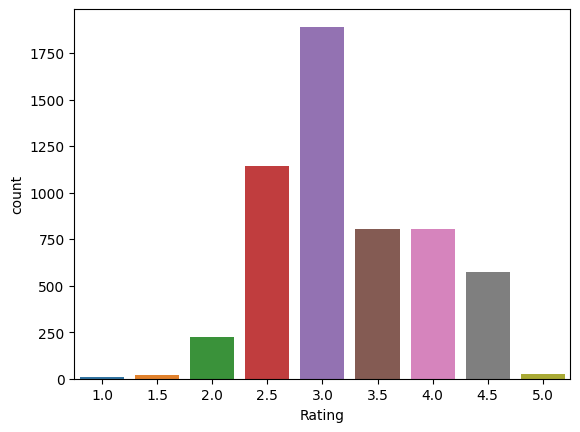

In [17]:
sns.countplot(x=ratings_avg['Rating'])

In [19]:
features_classification = df_regression.drop(['Rating'],axis=1)
features_classification

,Image Name,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,...,Contrast,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7
0,AM218.jpg,1.981239,2.836753,1.339132,1.344277,1.924745,2.119258,0.698418,2.810133,3.296268,...,64.115677,0.267573,0.994363,3.008452,7.453705,11.847560,11.061994,-22.518465,-14.789184,-23.571473
1,AM1948.jpg,1.833635,2.929858,1.270414,1.030303,1.646262,3.002603,0.625844,3.437585,1.994821,...,227.285927,0.356354,0.987348,2.939510,7.042255,12.052818,12.672708,-25.051330,-16.236641,-25.611590
2,AM1946.jpg,1.933288,2.395209,1.465257,1.564513,1.938322,1.566378,0.807148,2.495686,2.343096,...,129.332771,0.294714,0.991391,2.981613,7.460082,10.863173,10.597546,-21.330205,-14.364314,-22.316672
3,AM214.jpg,1.882761,2.341275,1.431507,1.531422,1.904373,2.315791,0.804161,3.459990,2.684211,...,312.500025,0.149893,0.976310,2.748384,6.986360,9.662708,9.387926,18.942285,12.945501,19.364469
4,AM1939.jpg,1.937528,2.324811,1.584223,1.333695,1.600281,3.693109,0.833413,4.915896,3.172618,...,105.220221,0.360506,0.990929,3.042141,8.100464,11.354806,10.838226,-22.403855,-15.233655,21.961341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,CF710.jpg,1.924013,2.483051,1.735093,1.370213,1.768340,1.550767,0.774858,2.191186,6.519202,...,225.159902,0.192622,0.986148,2.818653,6.729160,10.130414,10.211114,-20.431246,-13.592385,-20.727749
5481,CF438.jpg,1.888889,2.644444,1.650870,1.587381,2.222333,1.399654,0.714286,1.922305,3.607370,...,127.063872,0.335066,0.989988,2.921040,8.002540,11.058992,10.553896,21.362571,14.577149,-22.355600
5482,CF711.jpg,2.203964,3.361684,1.646898,1.818176,2.773245,1.685601,0.655613,2.082643,2.113201,...,197.747753,0.036160,0.983474,2.993462,7.884668,9.813330,10.603605,-22.012686,-15.676459,20.812936
5483,CF444.jpg,2.017300,2.705405,1.796432,1.680804,2.254128,1.282793,0.745656,1.855203,3.418269,...,126.920147,0.355544,0.992042,2.783176,7.273966,12.292176,11.326846,23.735805,15.045164,-23.150547


In [20]:
df_classification = pd.merge(features_classification, ratings_avg, left_on='Image Name', right_on='Filename', how='left').drop('Filename', axis=1)
df_classification

,Image Name,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,...,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7,Rating
0,AM218.jpg,1.981239,2.836753,1.339132,1.344277,1.924745,2.119258,0.698418,2.810133,3.296268,...,0.267573,0.994363,3.008452,7.453705,11.847560,11.061994,-22.518465,-14.789184,-23.571473,4.5
1,AM1948.jpg,1.833635,2.929858,1.270414,1.030303,1.646262,3.002603,0.625844,3.437585,1.994821,...,0.356354,0.987348,2.939510,7.042255,12.052818,12.672708,-25.051330,-16.236641,-25.611590,3.5
2,AM1946.jpg,1.933288,2.395209,1.465257,1.564513,1.938322,1.566378,0.807148,2.495686,2.343096,...,0.294714,0.991391,2.981613,7.460082,10.863173,10.597546,-21.330205,-14.364314,-22.316672,3.5
3,AM214.jpg,1.882761,2.341275,1.431507,1.531422,1.904373,2.315791,0.804161,3.459990,2.684211,...,0.149893,0.976310,2.748384,6.986360,9.662708,9.387926,18.942285,12.945501,19.364469,2.5
4,AM1939.jpg,1.937528,2.324811,1.584223,1.333695,1.600281,3.693109,0.833413,4.915896,3.172618,...,0.360506,0.990929,3.042141,8.100464,11.354806,10.838226,-22.403855,-15.233655,21.961341,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5480,CF710.jpg,1.924013,2.483051,1.735093,1.370213,1.768340,1.550767,0.774858,2.191186,6.519202,...,0.192622,0.986148,2.818653,6.729160,10.130414,10.211114,-20.431246,-13.592385,-20.727749,4.0
5481,CF438.jpg,1.888889,2.644444,1.650870,1.587381,2.222333,1.399654,0.714286,1.922305,3.607370,...,0.335066,0.989988,2.921040,8.002540,11.058992,10.553896,21.362571,14.577149,-22.355600,2.5
5482,CF711.jpg,2.203964,3.361684,1.646898,1.818176,2.773245,1.685601,0.655613,2.082643,2.113201,...,0.036160,0.983474,2.993462,7.884668,9.813330,10.603605,-22.012686,-15.676459,20.812936,4.0
5483,CF444.jpg,2.017300,2.705405,1.796432,1.680804,2.254128,1.282793,0.745656,1.855203,3.418269,...,0.355544,0.992042,2.783176,7.273966,12.292176,11.326846,23.735805,15.045164,-23.150547,2.5


In [ ]:
# Save the dataframe as a CSV file
df_classification.to_csv('/content/drive/MyDrive/Classification_Features.csv', index=False)